# Vectorisation Tf Idf et classification avec LinearSVC avec suppression des stop words et lemmatisation

In [1]:
from common.text_classification_utils import *

dataset = load_dataset()

dataset

[nltk_data] Downloading package stopwords to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,zrkrwmgseetfegaozv kovx vh,0,0,0,1
1,Comment puis-je me rendre de l'aéroport de CHA...,1,0,0,0
2,4f3;S0`HsL# hL8ydlwlM2cK7=,0,0,0,1
3,"u*]P\UsbAr,CoDnDdr*-GKN(0O",0,0,0,1
4,J'aimerais connaître le chemin pour aller de S...,1,0,0,0
...,...,...,...,...,...
1302960,Il a prétendu être mon ami.,0,0,1,0
1302961,I am planning a trip from saint paul les dax t...,0,1,0,0
1302962,Go from the train station of Loches to Venarey...,0,1,0,0
1302963,Je souhaiterais aller à verneuil sur serre dep...,1,0,0,0


In [2]:
labels, id2label, label2id = prepare_labels(dataset)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


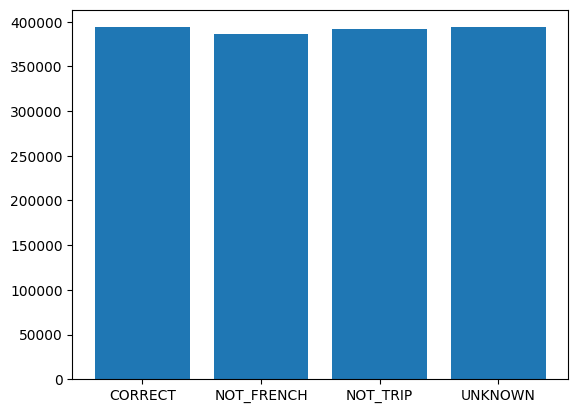

In [3]:
show_labels_distribution(dataset, labels)

# Suppression des stop words + lemmatisation

In [4]:
dataset['text'] = dataset['text'].apply(lemmatize_text)

# Split du dataset en train, test et validation

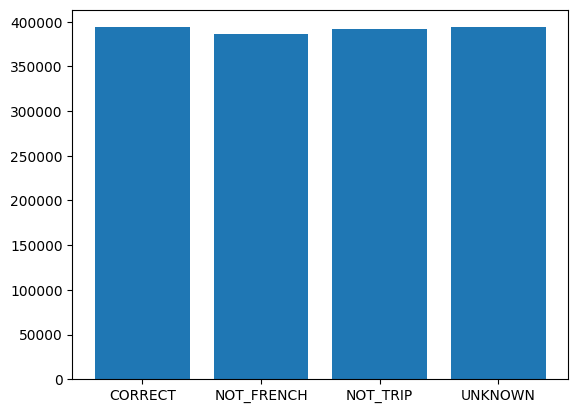

In [5]:
dataset = flatten_trips_labels(dataset)

show_labels_distribution(dataset, labels)

In [6]:
X_train, X_test, X_val, y_train, y_test, y_val = split_dataset(dataset, labels, final_dataset_size=0.9)

In [7]:
X_train.values

array(['mdfylmovsvm gc jnjpe tzbu',
       'aller place centrale hazebrouck place centrale vorey',
       'head towards st jean bassel eglis from another city', ...,
       'aimerais aller place centrale dijon partant place centrale saint julien villa',
       'p ox va gsyl p ghykouv',
       'i looking for a way to arrive at ventimiglia stazione'],
      dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier LogisticRegression avec OneVsRestClassifier pour la classification multi-label)

In [8]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

pipeline = create_pipeline(
    CountVectorizer(ngram_range=(1, 2)),
    CalibratedClassifierCV(LinearSVC(tol=1e-2, max_iter=1000), method='sigmoid', cv=5)
)

# evaluate_model_kfold_with_predictions(pipeline, dataset, labels, id2label)

pipeline.fit(X_train, y_train)

C:\Developpement\environments\nlp\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Developpement\environments\nlp\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Developpement\environments\nlp\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Developpement\environments\nlp\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Developpement\environ

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('classifier',
                 OneVsRestClassifier(estimator=CalibratedClassifierCV(cv=5,
                                                                      estimator=LinearSVC(tol=0.01))))])

# Evaluation du modèle, métriques

In [9]:
y_pred = pipeline.predict(X_test)

show_classification_report(y_pred, y_test, labels)

Classification Report for 
              precision    recall  f1-score   support

     CORRECT       1.00      1.00      1.00      2303
  NOT_FRENCH       1.00      0.89      0.94      2229
    NOT_TRIP       1.00      0.92      0.96      2211
     UNKNOWN       0.97      0.99      0.98      2189

   micro avg       0.99      0.95      0.97      8932
   macro avg       0.99      0.95      0.97      8932
weighted avg       0.99      0.95      0.97      8932
 samples avg       0.97      0.96      0.96      8932


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# On observe ici que le modèle semble performant, avec malgré tout une petit faiblesse du recall pour les classes NOT_FRENCH et NOT_TRIP

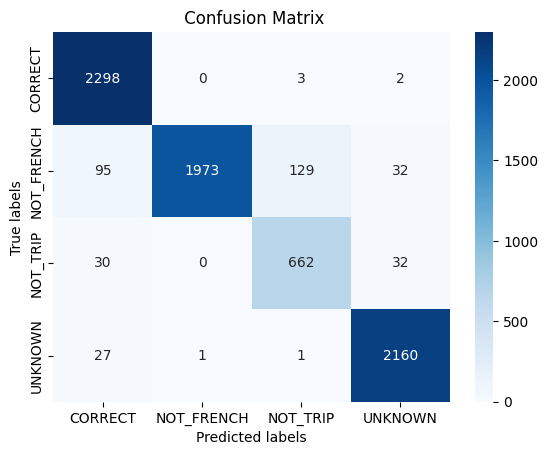

In [10]:
show_confusion_matrix(y_pred, y_test, labels)

# La matrice de confusion vient confirmer les très bons résultats observés précedemment

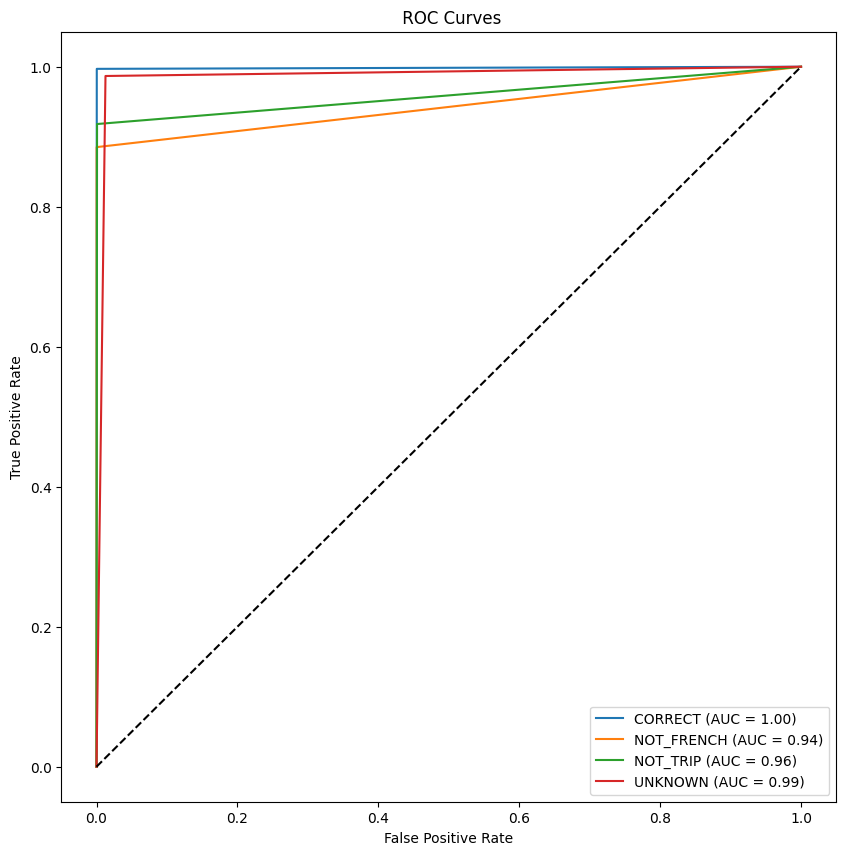

In [11]:
show_roc_curves(labels, y_pred, y_test)

In [12]:
show_samples_predictions(pipeline, id2label)

* Je veux aller de Port-Boulet à Le Havre.
 - CORRECT => 86.3%
 - NOT_FRENCH => 7.4%
 - NOT_TRIP => 18.5%
 - UNKNOWN => 0.0%

* Je veux aller de Port-Boulet au Havre.
 - CORRECT => 85.7%
 - NOT_FRENCH => 10.8%
 - NOT_TRIP => 25.8%
 - UNKNOWN => 0.0%

* Je vais de Nantes à Paris.
 - CORRECT => 92.6%
 - NOT_FRENCH => 8.8%
 - NOT_TRIP => 23.9%
 - UNKNOWN => 0.0%

* Je vais de Nantes à Nantes.
 - CORRECT => 96.6%
 - NOT_FRENCH => 8.3%
 - NOT_TRIP => 15.9%
 - UNKNOWN => 0.1%

* Je veux aller de Nantes à Nantes.
 - CORRECT => 98.2%
 - NOT_FRENCH => 6.2%
 - NOT_TRIP => 16.2%
 - UNKNOWN => 0.0%

* Je vais à Port-Boulet en partant de Le Havre
 - CORRECT => 100.0%
 - NOT_FRENCH => 8.2%
 - NOT_TRIP => 5.6%
 - UNKNOWN => 0.0%

* Je vais à Port-Boulet en partant du Havre
 - CORRECT => 100.0%
 - NOT_FRENCH => 7.4%
 - NOT_TRIP => 5.1%
 - UNKNOWN => 0.0%

* Peux-tu m'aider à trouver mon chemin vers Paris en partant d'Épierre ?
 - CORRECT => 100.0%
 - NOT_FRENCH => 4.5%
 - NOT_TRIP => 12.8%
 - UNKNOWN 

# L'ajout de la mécanique de suppression des stop words + lemmatisation semble avoir réduit les performances du modèle, contraitement à lorsqu'on l'utilise avec MultinomialNB en BoW par exemple (score de confiance légèrement plus faible pour les prédictions, et moins de prédictions correctes sur le jeu de test)